In [1]:
# Load image stack.
from skimage.io import imread, imshow
stack = imread('/home/jiongyi/jupyter/branched-networks/bead-motility/average-intensity-projection.tif')

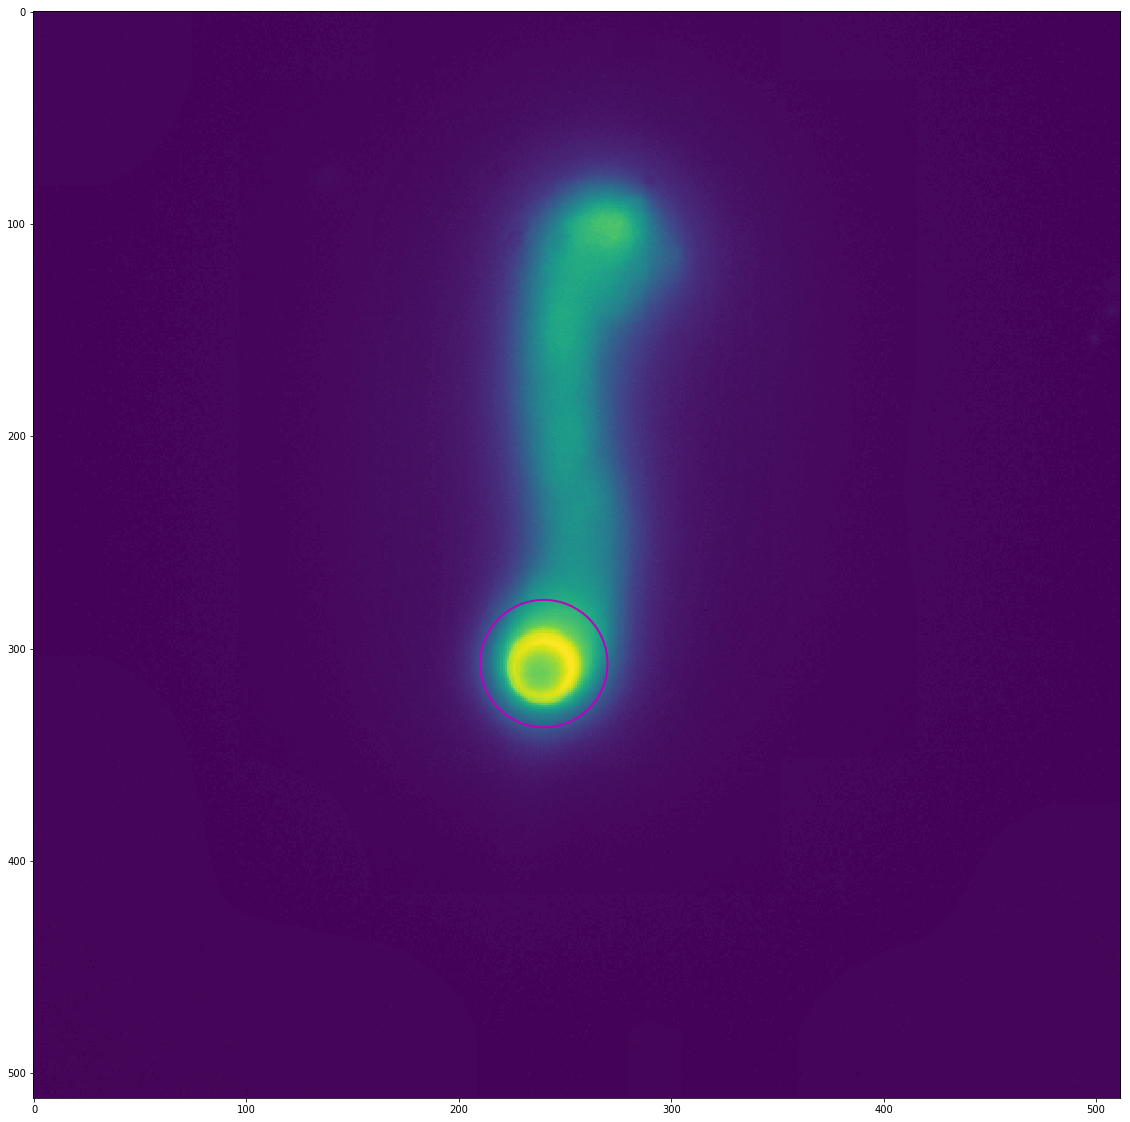

In [2]:
# Find bead.
from skimage.feature import blob_doh
from skimage.exposure import equalize_adapthist
from matplotlib.pyplot import subplots, Circle
egfpImage = stack[0, :, :]
alexa627Image = stack[1, :, :]

adaptHistImage = equalize_adapthist(egfpImage)
blobs = blob_doh(adaptHistImage, max_sigma = 30)
y, x, r = blobs[0]

fig, axes = subplots(1, 1, figsize = (20, 20))
axes.imshow(adaptHistImage)
c = Circle((x, y), r, color = 'm', linewidth = 2, fill = False)
axes.add_patch(c)

1721.0
849.5722657738266


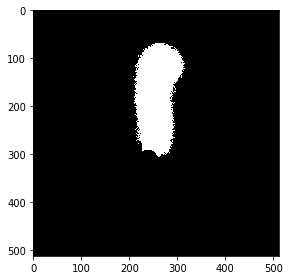

In [4]:
# Find tail
from skimage.filters import threshold_otsu
from numpy import mean, std, median
tailImage = equalize_adapthist(alexa627Image) - adaptHistImage
tailImage[tailImage <- 0] = 0
threshold = threshold_otsu(tailImage)
isTailImage = tailImage > threshold
print(median(alexa627Image[isTailImage]) - median(alexa627Image[~isTailImage]))
print(std(alexa627Image[isTailImage]))
imshow(isTailImage)
